<a href="https://colab.research.google.com/github/TGB85/shark_attacks/blob/main/shark_attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shark attack
1. what are the most dangerous types of sharks to humans?
> White shark, tiger shark, bull shark - in terms of number of attacks and number of fatal attacks.
2. are children more likely to be attacked by sharks?
> Not particularly. With ages ranging from 1 to 87, those under the age of 18 account for 27.7% over the recorded shark attacks. In 2011, people under 18 made up 29.3% of the world population.
3. are shark attacks where sharks were provoked more or less dangerous?
> Less dangerous in the sense that 3.48% of provoked attacks were fatal, while 25.69% of unprovoked attacks were fatal.  
4. are certain activities more likely to result in a shark attack?
> Of shark attacks recorded, 22.7% were the result of surfing, 19.6% of fishing and 18.7% of swimming.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/attacks.csv', encoding='iso-8859-1', usecols=['Year', 'Type', 'Country', 'Activity', 'Age', 'Injury', 'Fatal (Y/N)', 'Species '], skipinitialspace=True)
# with open('attacks.csv', encoding='iso-8859-1') as f:
#     contents = f.read()
# contents
df.columns = ['year', 'type', 'country', 'activity', 'age', 'injury', 'fatal', 'species']

# drop rows of Invalid or Questionable type
df.drop(df.loc[(df['type']=='Invalid') | (df['type']=='Questionable')].index, inplace=True)

df.head()

,year,type,country,activity,age,injury,fatal,species
0,2018.0,Boating,USA,Paddling,57,"No injury to occupant, outrigger canoe and pad...",N,White shark
1,2018.0,Unprovoked,USA,Standing,11,Minor injury to left thigh,N,NaN
3,2018.0,Unprovoked,AUSTRALIA,Surfing,NaN,Minor injury to lower leg,N,2 m shark
4,2018.0,Provoked,MEXICO,Free diving,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m"
5,2018.0,Unprovoked,AUSTRALIA,Kite surfing,NaN,"No injury, board bitten",N,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25174 entries, 0 to 25722
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      5752 non-null   float64
 1   type      5749 non-null   object 
 2   country   5708 non-null   object 
 3   activity  5329 non-null   object 
 4   age       3230 non-null   object 
 5   injury    5732 non-null   object 
 6   fatal     5738 non-null   object 
 7   species   2930 non-null   object 
dtypes: float64(1), object(7)
memory usage: 1.7+ MB


# What are the most dangerous types of sharks to humans?

## Fatal

In [20]:
# df['fatal'].value_counts()

def replace_values(df, col_name, old, new):
  df[col_name] = df[col_name].replace({old:new})

replace_values(df, 'fatal', 'Y', 'Y')
replace_values(df, 'fatal', 'y', 'Y')
replace_values(df, 'fatal', '2017', 'Y')
# replace 'unknown' and 'M' with 'N' 
df.loc[df['fatal'] != 'Y', 'fatal'] = 'N'

# df['type'].value_counts()
replace_values(df, 'type', 'Boat', 'Boating')
replace_values(df, 'type', 'Boatomg', 'Boating')

## Species
Possible bias:
* Grouped sharks based on list of common sharks, even though the most dangerous might be the most *un*common. After grouping, what values are left?  
* Copied 88 shark species names from [floridamuseum](https://www.floridamuseum.ufl.edu/discover-fish/sharks/species-profiles/) into csv, simplified the keywords, included a few different spellings.  
* A value might include multiple keywords.
* Compensated for only a few different spellings (such as *blacktip*, *black-tip* and *black tip*), but identification seems uncertain in some instances (*grey shark*/ *grey reef shark* / *reef shark*?).
* Replaced instances of shark *not confirmed* or *uncertain* with *None*, but left values with question marks.

In [6]:
# df2['species'].value_counts()
no_shark = ['unidentified', 'not confirmed', 'unconfirmed', 'no shark', 'Possibly', 'Questionable', ' or ', 'invalid']
for word in no_shark:
  df.loc[df['species'].str.contains(word, case=False, na=False), 'species'] = None
# replace empty string & nan with None
replace_values(df, 'species', ' ', None)
replace_values(df, 'species', np.nan, None)

df2 = df.loc[~df['species'].isnull(), ['fatal', 'species', 'year']]

In [7]:
# grouping common sharks
common_sharks = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sharks.csv')
df2['common_sharks'] = None
for shark in common_sharks['shark_name']:
     df2.loc[df2['species'].str.contains(shark, case=False, na=False), 'common_sharks'] = shark

# regrouping different spellings
df2['common_sharks'].replace('zambesi', 'bull', inplace=True)
df2['common_sharks'].replace('black-tip', 'blacktip', inplace=True)
df2['common_sharks'].replace('black tip', 'blacktip', inplace=True)
df2['common_sharks'].replace('seven-gill', 'sevengill', inplace=True)
df2['common_sharks'].replace('smooth hound', 'smoothhound', inplace=True)

df2.value_counts('common_sharks', dropna=False) # 998 rows with no identified species
# df2.loc[df2['common_sharks'].isnull()]

common_sharks
NaN              998
white shark      616
tiger shark      250
bull             188
whale             72
blacktip          66
nurse             54
mako              51
blue              50
wobbegong         49
hammerhead        45
raggedtooth       43
sand              42
grey nurse        37
reef              33
lemon             32
oceanic           24
grey reef         17
spinner           17
sevengill         14
dusky             10
dog               10
carpet             8
galapagos          7
basking            7
angel              6
porbeagle          6
copper             5
silky              4
thresher           4
shovelnose         3
tawny nurse        3
catshark           3
whitetip reef      3
salmon             2
silvertip          2
smoothhound        2
leopard            2
goblin             2
jackson            1
horn               1
cookiecutter       1
dtype: int64

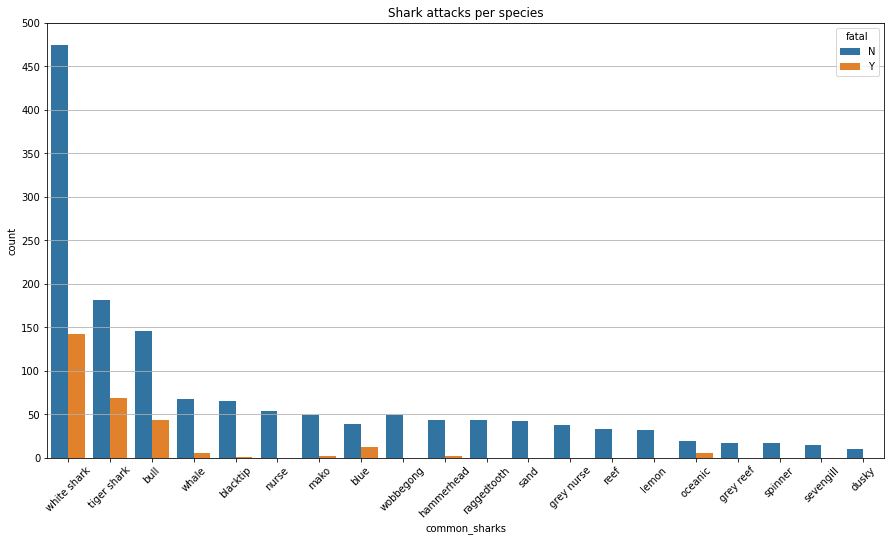

In [8]:
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.countplot(data=df2, x='common_sharks', hue='fatal', order=df2['common_sharks'].value_counts().iloc[:20].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticks(range(0, 501, 50))
ax.grid(True, axis='y')
ax.set(title="Shark attacks per species")
sns.move_legend(ax, "upper right")
plt.show()

## Year
Did one of these species become more dangerous over time? 
> Overall increase over time in number of incidents recorded.  
> The number of attacks by white sharks and bull sharks seems to increase in last 20 years.

In [63]:
df2['year'] = df2['year'].apply(np.int64)
df2.drop(df2.loc[df2['year']==0].index, inplace=True)

# selecting top five fatal species
top_five_fatal = (df2['common_sharks'] == 'white shark') | (df2['common_sharks'] == 'tiger shark') | (df2['common_sharks'] == 'bull') | (df2['common_sharks'] == 'whale') | (df2['common_sharks'] == 'blue')
fatal_species = df2.loc[top_five_fatal] # & (df2['fatal'] == 'Y')

# fig, ax = plt.subplots(figsize=(15, 8))
# ax = sns.histplot(data=fatal_species, x='year', hue='common_sharks', hue_order=fatal_species.common_sharks.value_counts().index, element='poly')
# ax.set(title='Species with most fatal attacks, over time')
# sns.move_legend(ax, "upper left")
# plt.show()

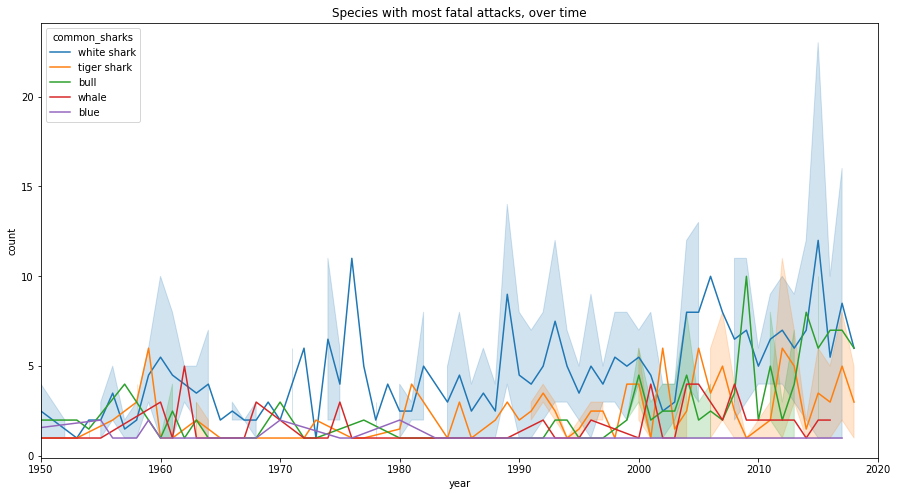

In [62]:
fatal_grp = fatal_species.groupby(['year', 'common_sharks', 'fatal']).species.count().reset_index().rename(columns={'species': 'count'})
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.lineplot(data=fatal_grp, x='year', y='count', hue='common_sharks', hue_order=fatal_species.common_sharks.value_counts().index)
ax.set_xlim(1950, 2020)
ax.set(title='Species with most fatal attacks, over time')
sns.move_legend(ax, "upper left")
plt.show()

#  Are children more likely to be attacked by sharks?
Possible bias:
* This dataset includes shark attacks over a period of time, all over the world. Demographics, however, differ per place and change over time.
* To flatly compare demographics: in 2011, those under 18 years old made up 29.3% of the word population. See: [wiki](https://en.wikipedia.org/wiki/Demographics_of_the_world)
* To fully answer this question might also require information on whether children are more likely to be near water.
* Ages recorded range from 1 to 87.

## Age
Filtering out all values with text ('young', 'teen', '2 or 3 months', '10 or 12', '20s') seems to disproportionally filter out ages under 30.  
This edit changes about 65 values:
- young, adult, elderly => drop
- contains 'teen' => 15
> possible bias: this creates about 15 values of age 15
- contains 'months' => take number before / 12
- if age ends with 's' => two numbers before
- contains & => two numbers after
- contains ' or ' => two numbers before
- contains ' to '=> two numbers after  

In [10]:
df3 = df.loc[:, ['type', 'age']].copy()
df3.dropna(subset=['age'], inplace=True)

# edit age
def edit_age(x):
    if x.find('teen') > -1:
        x = 15
    elif x.find('Teen') > -1:
        x = 15
    elif x.find('months') > -1:
        pos = x.find('months')
        x = int(x[pos-2:pos-1])/12
    elif x[-1] == 's':
        x = x[-3:-1]
    elif x.find(' & ') > -1:
        pos = x.find(' & ')
        x = x[pos+4:pos+7]
    elif x.find(' or ') > -1:
        pos = x.find(' or ')
        x = x[pos-2:pos]
    elif x.find(' to ') > -1:
        pos = x.find(' to ')
        x = x[pos+4:pos+7]
    else:
        x = x
    return x
df3['age'] = df3['age'].apply(edit_age) # results in 3230 rows

# filter out remaining values with strings, as found on https://stackoverflow.com/questions/33961028/remove-non-numeric-rows-in-one-column-with-pandas
def is_float(x):
  try:
    float(x)
  except ValueError:
    return False
  return True
df3 = df3.loc[df3['age'].apply(lambda x: is_float(x))] # results in 3207 rows
df3['age'] = df3['age'].values.astype(np.int64)

In [11]:
# with child = age under 18, 27.7% of reported shark attacks involved children
sum_child = df3.loc[df3['age'] < 18].groupby('age').count().sum()
sum_adult = df3.loc[df3['age'] >= 18].groupby('age').count().sum()
total = sum_child+sum_adult

display(100*sum_child/total)

type    27.729258
dtype: float64

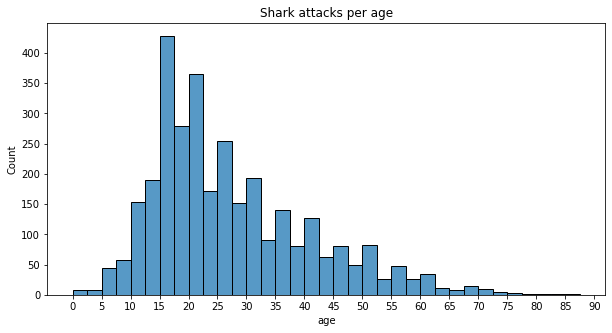

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.histplot(data=df3, x='age', bins=35, binwidth=2.5)
ax.set_xticks(range(0, 91, 5))
ax.set(title='Shark attacks per age')
plt.show()

,age,count
age,1.000000,-0.540459
count,-0.540459,1.000000


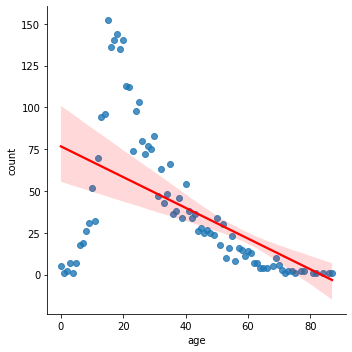

In [77]:
# relation / correlation
age_grp = df3.groupby('age')['type'].count().reset_index().rename(columns={'type': 'count'})
sns.lmplot(data=age_grp, x='age', y='count', line_kws={'color': 'red'})
age_grp.corr()

## Type
Are children more likely to provoke a shark attack?
> No. Most unprovoked: between 17 and 34, most provoked: between ages 20 and 39.

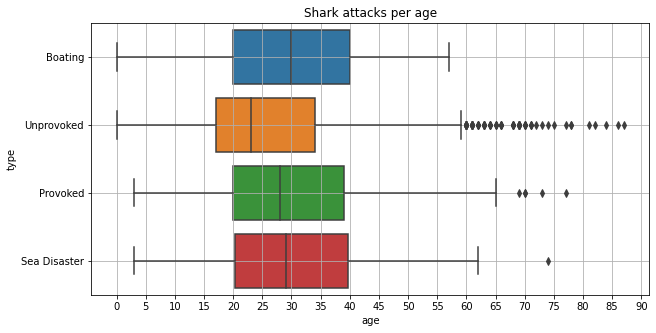

In [76]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.boxplot(data=df3, x='age', y='type')
ax.set_xticks(range(0, 91, 5))
ax.set(title='Shark attacks per age')
ax.grid(True)
plt.show()

In [82]:
# with child = age under 18, 15.6% of reported shark attacks that were provoked involved children
sum_child = df3.loc[(df3['age'] < 18) & (df3['type'] == 'Provoked')].groupby('age').count().sum()
sum_adult = df3.loc[(df3['age'] >= 18) & (df3['type'] == 'Provoked')].groupby('age').count().sum()
total = sum_child+sum_adult

display(100*sum_child/total)

type    15.57971
dtype: float64

# Are shark attacks where sharks were provoked more or less dangerous?
Unfortunately, it doens't seem possible to categorize the *injury* column.  
Although not a very precise indication of danger, *fatal* and *non-fatal* are the only measurements used.

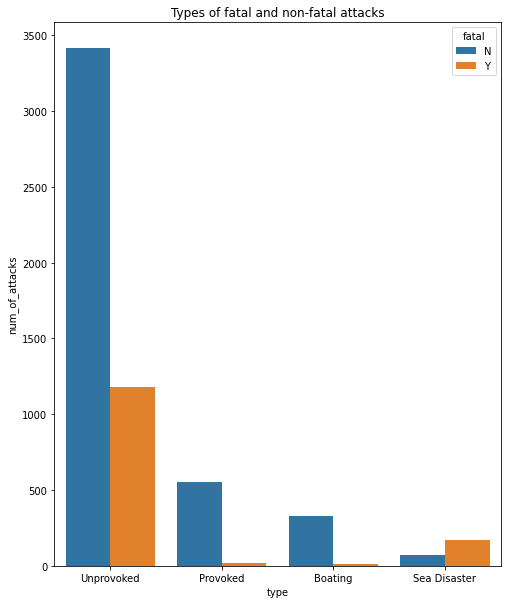

In [79]:
df4 = df.groupby(['type', 'fatal']).year.count().reset_index().rename(columns={'year': 'num_of_attacks'})

fig, ax = plt.subplots(figsize=(8, 10))
ax = sns.barplot(y='num_of_attacks', x='type', hue='fatal', order=df['type'].value_counts().index, data=df4)
ax.set(title='Types of fatal and non-fatal attacks')
plt.show()

In [80]:
# out of 574 provoked attacks, 20 were fatal = 3.48 %, out of 4594 unprovoked attacks, 1180 were fatal = 25.69%
df4['percent_of_type'] = df4.groupby('type').num_of_attacks.apply(lambda x: 100*x/x.sum())
df4

,type,fatal,num_of_attacks,percent_of_type
0,Boating,N,330,96.774194
1,Boating,Y,11,3.225806
2,Provoked,N,554,96.515679
3,Provoked,Y,20,3.484321
4,Sea Disaster,N,71,29.707113
5,Sea Disaster,Y,168,70.292887
6,Unprovoked,N,3414,74.314323
7,Unprovoked,Y,1180,25.685677


# Are certain activities more likely to result in a shark attack?
The activities that have resulted in shark attacks are also the activities people are most likely to do near water. Answering the question would require statistics on water activities.
Surfing, fishing and swimming are the activities that have resulted in the most recorded shark attacks.

## Activity
Possible bias: 
* Grouping reduces different activities to one keyword: such as *spearfishing*/*fishing*/*fishing for sharks* to *fishing*, different kinds of surfing to *surf* and swimming - which happens under different circumstances, like *Swimming after falling overboard* - to *swimming*.  
* It leaves out highly dangerous *activities* such as: *Attempting to kill a shark with explosives*.  
* Grouping is based on observing value_counts(), thereby reinforcing keywords that appear often. 
* Distinctions between values are unclear: how is *floating* different from *swimming* or *wading* and *treading water* different from *walking*? Some *fishing* activities are classified as a *boating* type but not a *boating* activity.  
* Some values contain multiple keywords.

In [17]:
df5 = df.loc[:, ['activity', 'type']].copy()
# drop if activity is empty
df5.dropna(subset=['activity'], inplace=True)
# if type 'Sea Disaster', activity = 'Disaster'
df5.loc[df5['type'] == 'Sea Disaster', 'activity'] = 'Disaster'

# grouping activities
activities = ['Swimming', 'Surf', 'Fishing', 'Diving', 'Boarding', 'Fell', 'Floating', 'Wading', 'Playing', 'Canoe', 'Kayak', 'Standing', 'Sailing', 'Bathing', 'Walking', 'Row']
for act in activities:
     df5.loc[df5['activity'].str.contains(act, case=False), 'activity'] = act

# percentage for top three activities
display((100*1192/5329), (100*1047/5329), (100*995/5329))
df5['activity'].value_counts().iloc[:20] # total rows = 5329

22.36817414148996

19.647213360855694

18.671420529179958

Surf              1192
Fishing           1047
Swimming           995
Diving             454
Disaster           228
Bathing            173
Wading             152
Boarding           139
Standing           128
Snorkeling          87
Fell                78
Floating            43
Kayak               34
Row                 31
Treading water      30
Canoe               21
Walking             18
Playing             18
Sailing             11
Boating              7
Name: activity, dtype: int64

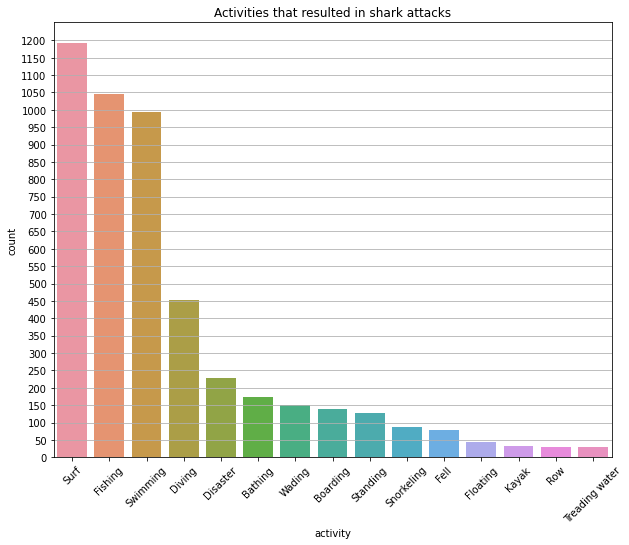

In [18]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(data=df5, x='activity', order=df5['activity'].value_counts().iloc[:15].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticks(range(0, 1201, 50))
ax.grid(True, axis='y')
ax.set(title="Activities that resulted in shark attacks")
plt.show()